# Nos EUA, o número 911 é destinado à emergências. O Kaggle disponibilizou dados de ligações para o serviço:

    lat: Variável String, Latitude
    lng: Variável String, Longitude
    desc: Variável String, Descrição da Chamada de Emergência
    zip: Variável String, CEP
    título: Variável String, Título
    timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
    twp: Variável String, Township
    addr: Variável String, Endereço
    e: Variável String, variável Dummy (sempre 1)
    
    Siglas:
    
    EMS	emergency medical service
    



In [160]:
import pandas as pd
import numpy as np
import calendar
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from matplotlib import colors
from matplotlib.font_manager import FontProperties

In [112]:
call = pd.read_csv('/temp/911.csv', ',')

In [113]:
#primeiros tratamentos no dataset

#excluindo variaveis que não serão utéis
df = call.drop(['e'], axis=1, inplace=False)
df = df.drop(['zip'], axis=1, inplace=False)

#criando variavel reason / motivos
df['Type'] = call['title'].str.split(':',1, expand=True)[0]
df['Reason'] = call['title'].str.split(':',1, expand=True)[1]

#cria lista com os nomes da semana
wday = list(calendar.day_abbr)

#convertendo para datatime e criando as variaveis de hour / hora, day / dia, month / mes, year / ano, week / semana
df['timeStamp'] = pd.to_datetime(call['timeStamp'])
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Day'] = df['timeStamp'].apply(lambda x: x.day)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Year'] = df['timeStamp'].apply(lambda x: x.year)
df['Week'] = df['timeStamp'].apply(lambda x: x.weekday())
df['Week_Abbr'] = df['timeStamp'].apply(lambda x: wday[x.weekday()])



In [114]:
df.head(1)

,lat,lng,desc,title,timeStamp,twp,addr,Type,Reason,Hour,Day,Month,Year,Week,Week_Abbr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,17,10,12,2015,3,Thu


In [115]:
resposta = [["Type","Qualitativa Nominal"],
            ["Reason","Qualitativa Nominal"],
            ["Week","Qualitativa Nominal"],
            ["Month","Quantitativa Discreta"],
            ["Year","Quantitativa Discreta"],
            ["Hour","Quantitativa Discreta"]]
variaveis = pd.DataFrame(resposta, columns=["Variavel", "Classificação"])
variaveis

,Variavel,Classificação
0,Type,Qualitativa Nominal
1,Reason,Qualitativa Nominal
2,Week,Qualitativa Nominal
3,Month,Quantitativa Discreta
4,Year,Quantitativa Discreta
5,Hour,Quantitativa Discreta


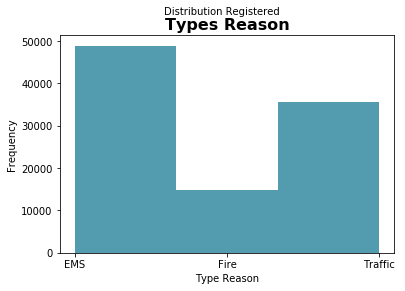

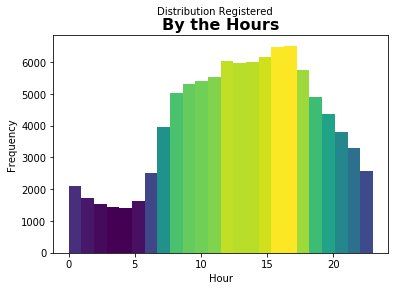

In [116]:
# Define a function for a histogram
def histogram(data, x_label, y_label, title, suptitle, n_bins):
    _, ax = plt.subplots()
    ax.hist(data, color = '#539caf', bins=n_bins)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title, fontsize=16, fontweight='bold')
    plt.suptitle(suptitle, fontsize=10)

def histogramColors(data, x_label, y_label, title, suptitle, n_bins):
    _, ax = plt.subplots()

    # N is the count in each bin, bins is the lower-limit of the bin
    N, bins, patches = ax.hist(data, bins=n_bins)

    # We'll color code by height, but you could use any scalar
    fracs = N / N.max()

    # we need to normalize the data to 0..1 for the full range of the colormap
    norm = colors.Normalize(fracs.min(), fracs.max())

    # Now, we'll loop through our objects and set the color of each accordingly
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)
        
    # We can also normalize our inputs by the total number of counts
    ax.hist(df['Hour'], bins=24, density=True)
    
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title, fontsize=16, fontweight='bold')
    plt.suptitle(suptitle, fontsize=10)
    
# Histograma Type Reason
histogram(data = df['Type'],
          x_label = 'Type Reason',
          y_label = 'Frequency',
          title = 'Types Reason',
          suptitle = 'Distribution Registered',
          n_bins = 3 )

# Histograma Hours Call's
histogramColors(data = df['Hour'],
          x_label = 'Hour',
          y_label = 'Frequency',
          title = 'By the Hours',
          suptitle = 'Distribution Registered',
          n_bins = 24 )


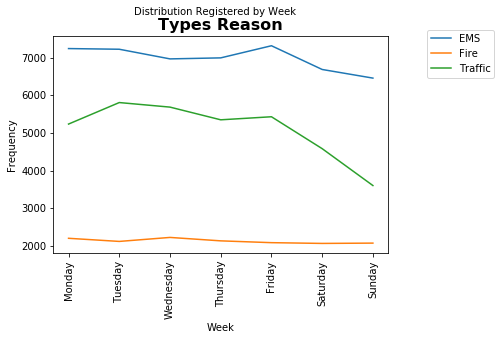

In [164]:
def plotLine(X, Y, Z, x_label, y_label, title, suptitle, row_labels):
    _, ax = plt.subplots()

    ax.plot(X, label="EMS")
    ax.plot(Y, label="Fire")
    ax.plot(Z, label="Traffic")

    ax.legend(loc='best')
    ax.legend(bbox_to_anchor=(1.1, 1.05))
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticklabels(row_labels, rotation='vertical')
    ax.set_title(title, fontsize=16, fontweight='bold')
    plt.suptitle(suptitle, fontsize=10)

plotLine(X = df[df['Type'] == 'EMS'].groupby(['Week']).size(),
         Y = df[df['Type'] == 'Fire'].groupby(['Week']).size(),
         Z = df[df['Type'] == 'Traffic'].groupby(['Week']).size(),
         x_label = "Week",
         y_label = 'Frequency',
         title = 'Types Reason',
         suptitle = 'Distribution Registered by Week',
         row_labels = ['','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

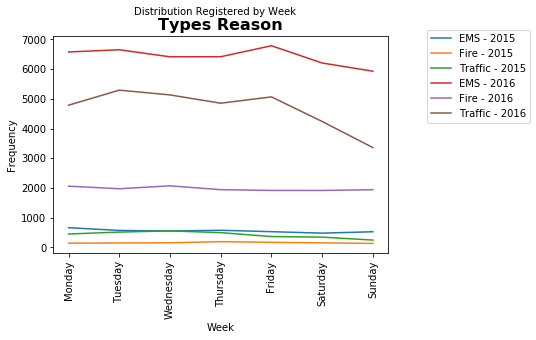

In [163]:
def plotLine(X1, Y1, Z1, X2, Y2, Z2, x_label, y_label, title, suptitle, row_labels):
    _, ax = plt.subplots()

    ax.plot(X1, label="EMS - 2015")
    ax.plot(Y1, label="Fire - 2015")
    ax.plot(Z1, label="Traffic - 2015")
    
    ax.plot(X2, label="EMS - 2016")
    ax.plot(Y2, label="Fire - 2016")
    ax.plot(Z2, label="Traffic - 2016")

    ax.legend(loc='best')
    ax.legend(bbox_to_anchor=(1.1, 1.05))
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticklabels(row_labels, rotation='vertical')
    ax.set_title(title, fontsize=16, fontweight='bold')
    plt.suptitle(suptitle, fontsize=10)
    


plotLine(X1 = df[(df['Type'] == 'EMS') & (df['Year'] == 2015)].groupby(['Week']).size(),
         Y1 = df[(df['Type'] == 'Fire') & (df['Year'] == 2015)].groupby(['Week']).size(),
         Z1 = df[(df['Type'] == 'Traffic') & (df['Year'] == 2015)].groupby(['Week']).size(),
         X2 = df[(df['Type'] == 'EMS') & (df['Year'] == 2016)].groupby(['Week']).size(),
         Y2 = df[(df['Type'] == 'Fire') & (df['Year'] == 2016)].groupby(['Week']).size(),
         Z2 = df[(df['Type'] == 'Traffic') & (df['Year'] == 2016)].groupby(['Week']).size(),
         x_label = "Week",
         y_label = 'Frequency',
         title = 'Types Reason',
         suptitle = 'Distribution Registered by Week',
         row_labels = ['','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])